# RIVET Python API (pyrivet)

In [1]:
from pyrivet import rivet
import numpy as np

Let's start with some warmups. We can run RIVET on an existing data file:

In [2]:
# The RIVET distribution comes with some test data files
import os

rivet_location = '../../rivet' #Might be in a different location for you
os.listdir(rivet_location + '/data/Test_Point_Clouds')


['circle_data_240pts_codensity.txt',
 'circle_data_60pts_codensity.txt.H0_x0_y0.rivet',
 'circle_data_600pts_codensity.txt',
 'circle_data_60pts_codensity.txt',
 'circle_data_60pts.png',
 'circle_data_240pts.png',
 'points1.txt',
 'points2.txt',
 'points3.txt',
 'circle_data_60pts_codensity.txt.H1_x20_y20.rivet',
 'points6.txt',
 'points4.txt',
 'points5.txt']

In [3]:
computed_file_path = rivet.compute_file(
    rivet_location + '/data/Test_Point_Clouds/circle_data_60pts_codensity.txt',
    homology=1,
    x=20,
    y=20)
computed_file_path

'../../rivet/data/Test_Point_Clouds/circle_data_60pts_codensity.txt.H1_x20_y20.rivet'

The output when used this way is a path to a file generated by RIVET. We can load the contents of that computed file into memory and run other RIVET commands on it, like computing barcodes.

In [4]:
with open(computed_file_path, 'rb') as f:
    computed_data = f.read()

codes = rivet.barcodes(computed_data, [
    (45, 0), # 45 degrees, offset 0
    (45, 1), # 45 degrees, offset 1
])
codes

[((45.0, 0.0), Barcode([Bar(6.98695, 7.68564, 1), Bar(5.65685, 6.28825, 1)])),
 ((45.0, 1.0), Barcode([Bar(5.65685, 5.68564, 1)]))]

Let's look at one barcode in the list. The format for each bar is Bar(birth, death, multiplicity)

In [5]:
barcode1 = codes[0][1]
barcode1

Barcode([Bar(6.98695, 7.68564, 1), Bar(5.65685, 6.28825, 1)])

A barcode can also be easily converted to a Numpy array:

In [6]:
barcode1.to_array()

array([[6.98695, 7.68564, 1.     ],
       [5.65685, 6.28825, 1.     ]])

We can also load data directly from memory.

In [7]:
#Equivalent to the 'points1.txt' sample data file in the RIVET distribution
points = rivet.PointCloud(
    points = [
        (0.3, 1.5),
        (4.2, 3.8),
        (5.6, 2.3),
        (2.9, 5.1),
        (3.3, 2.0)
    ],
    second_param_name='birth',
    appearance=0,
    max_dist=4.1
)

# Now let's take the Betti information
betti = rivet.betti(points)
betti

MultiBetti(dimensions=Dimensions(x_grades=[Fraction(0, 1)], y_grades=[Fraction(0, 1), Fraction(1838477, 1000000), Fraction(2012461, 1000000), Fraction(512957, 250000), Fraction(1159741, 500000), Fraction(3041381, 1000000), Fraction(3125699, 1000000), Fraction(388973, 100000)]), graded_rank=[[5.]
 [4.]
 [3.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]], xi_0=[(0, 0, 5)], xi_1=[(0, 1, 1), (0, 2, 1), (0, 3, 1), (0, 5, 1)], xi_2=[])

We can also provide a function that gives the grade of appearance of each point:

In [11]:
#Equivalent to the 'points2.txt' sample data file in the RIVET distribution
points = rivet.PointCloud(
    points = [
        (0.3, 1.5, 2.1), # will appear at 1
        (4.2, 3.8, 4.9), # will appear at 3.2
        (5.6, 2.3, 6),   # will appear at 2
        (2.9, 5.1, 3.3), # will appear at 4
        (3.3, 2.0, 2.5), # will appear at 2.5
        (4.1, 1.1, 2.3), # will appear at 2.4
        (1.1, 1.3, 1.7), # will appear at 2
    ],
    second_param_name='time',
    appearance=[1, 3.2, 2, 4, 2.5, 2.4, 2],
    max_dist=3.1 # pyrivet will calculate max_dist if you leave it out
)

# Now let's take the Betti information
betti = rivet.betti(points)
betti

MultiBetti(dimensions=Dimensions(x_grades=[Fraction(1, 1), Fraction(2, 1), Fraction(12, 5), Fraction(5, 2), Fraction(16, 5), Fraction(4, 1)], y_grades=[Fraction(0, 1), Fraction(9165151, 10000000), Fraction(244131, 200000), Fraction(2328089, 1000000), Fraction(2437211, 1000000), Fraction(1221679, 500000), Fraction(3065941, 1000000), Fraction(766893, 250000)]), graded_rank=[[1. 3. 4. 5. 6. 7.]
 [1. 2. 3. 4. 5. 6.]
 [1. 2. 3. 3. 4. 5.]
 [1. 2. 3. 3. 3. 4.]
 [1. 2. 3. 3. 3. 3.]
 [1. 2. 3. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2.]], xi_0=[(0, 0, 1), (1, 0, 2), (2, 0, 1), (3, 0, 1), (4, 0, 1), (5, 0, 1)], xi_1=[(1, 1, 1), (2, 6, 1), (3, 2, 1), (3, 5, 1), (4, 3, 1), (5, 4, 1)], xi_2=[(3, 6, 1)])

Now let's look at two persistence modules for molecules.

First, let's see how to compute L2 distance on Hilbert functions of the persistence modules.

In [12]:
# Let's look at H0, binned into 10x10.
aspirin_h0_betti = rivet.betti_file('aspirin-ZINC000000000053.sdf.txt', homology=0, x=10, y=10)
tylenol_h0_betti = rivet.betti_file('tylenol-ZINC000013550868.sdf.txt', homology=0, x=10, y=10)

# We can compute distance between these using Hilbert functions
from pyrivet import hilbert_distance
print("Distance with Hilbert functions:", 
      hilbert_distance.distance(
          aspirin_h0_betti, 
          tylenol_h0_betti
      )
     )



Distance with Hilbert functions: 3442399.7063080464


And now let's look at the matching distance.

In [13]:
# We can also compute the matching distance, if we have the full precomputed arrangement
aspirin_h0 = open(rivet.compute_file('aspirin-ZINC000000000053.sdf.txt', homology=0, x=10, y=10), 'rb').read()
tylenol_h0 = open(rivet.compute_file('tylenol-ZINC000013550868.sdf.txt', homology=0, x=10, y=10), 'rb').read()

from pyrivet import matching_distance
print("Distance with matching distance:",
      matching_distance.matching_distance(aspirin_h0, tylenol_h0, grid_size=10, normalize=True)
     )

Distance with matching distance: 1.2909725839903918e-06


While the RIVET GUI does many things that would be tricky to duplicate in a notebook, we can at least visualize the Hilbert
functions!

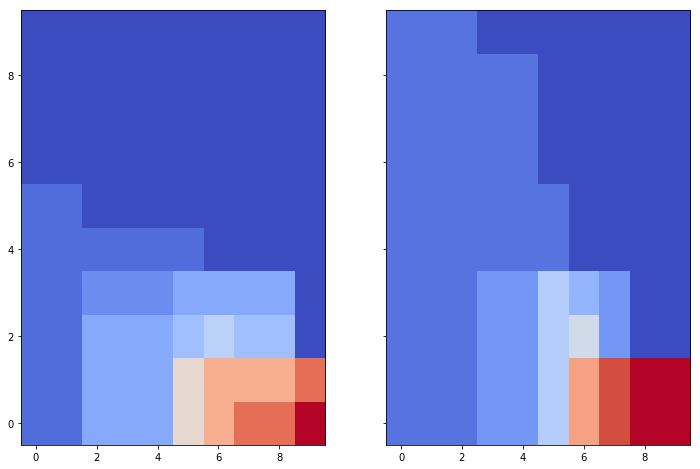

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,8))
plots = fig.subplots(1, 2, sharex=True, sharey=True)

plots[0].imshow(aspirin_h0_betti.graded_rank, origin='lower', aspect='auto', cmap='coolwarm')
plots[1].imshow(tylenol_h0_betti.graded_rank, origin='lower', aspect='auto', cmap='coolwarm')